In [287]:
#Importing the necessary libraraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
#Loading the data
data=pd.read_csv('/content/credit.csv')

In [289]:
#First 5 observations
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [290]:
#Shape of the data
data.shape

(100000, 28)

In the data we have 100000 observations and 28 variables

In [291]:
#Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

From the 28 variables 18 variables are float type, 3 are integer type and 7 are object type.

# Data Preprocessing

In [292]:
#Checking presence of missing values
data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There are no missing values

# Outlier Detection

In [293]:
#Selecting the columns for boxplot
col=['Age','SSN','Annual_Income','Monthly_Inhand_Salary',
     'Interest_Rate','Delay_from_due_date','Changed_Credit_Limit',
     'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age',
     'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

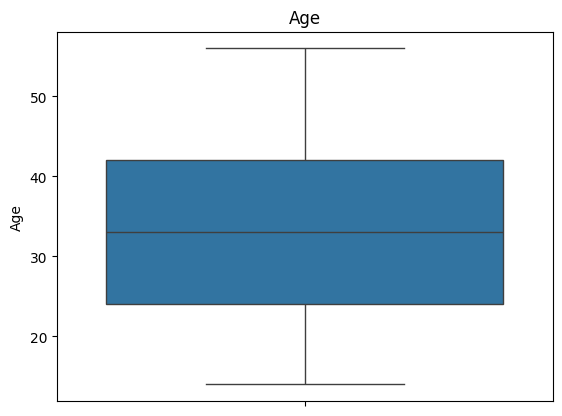

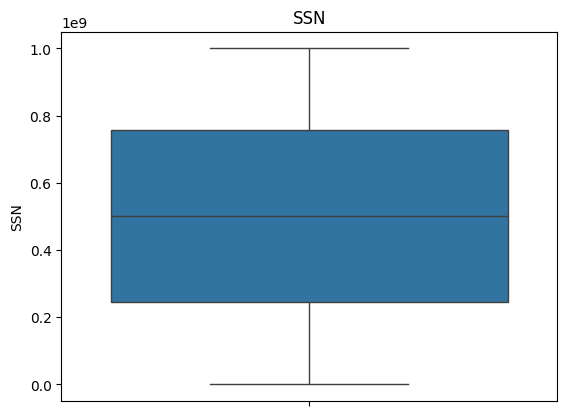

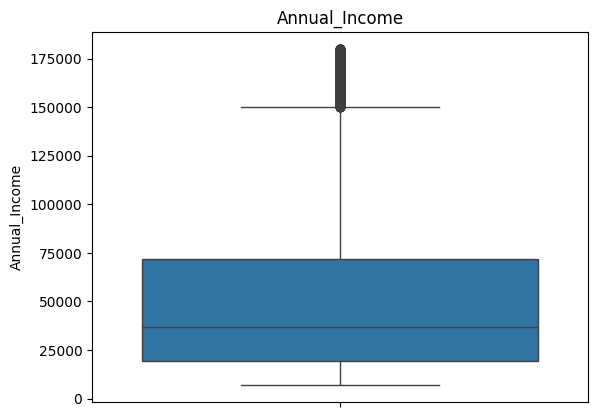

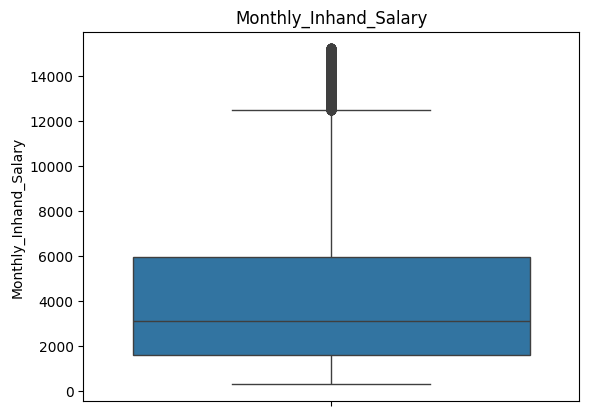

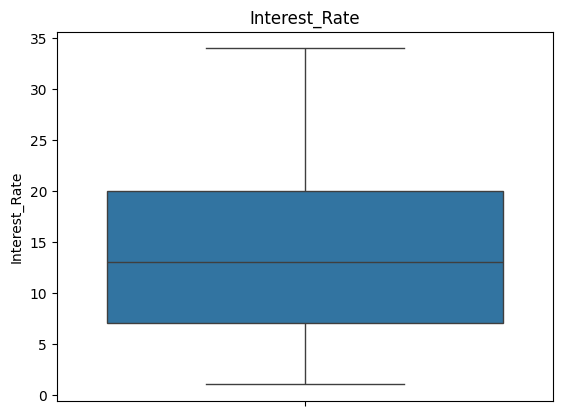

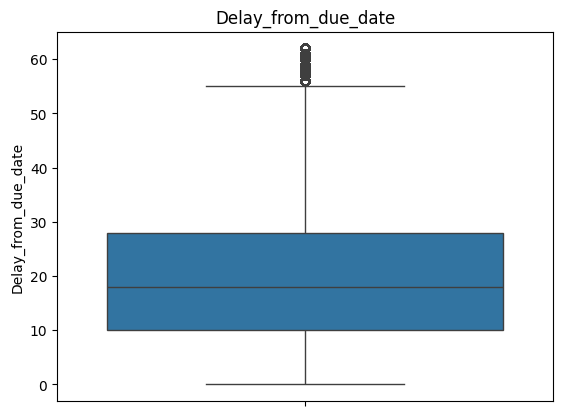

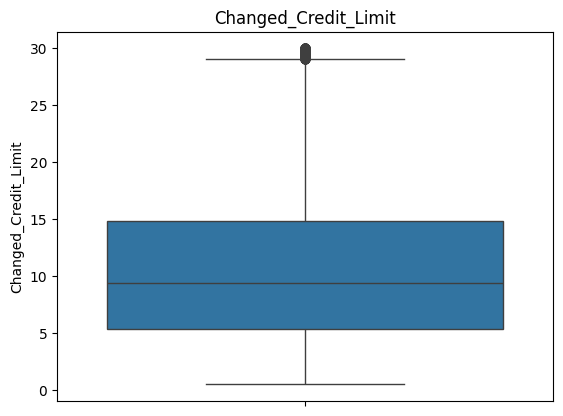

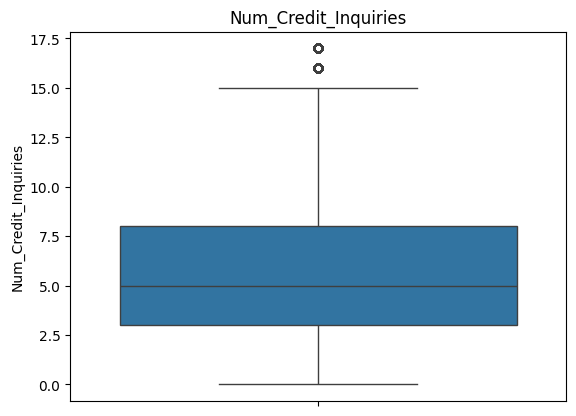

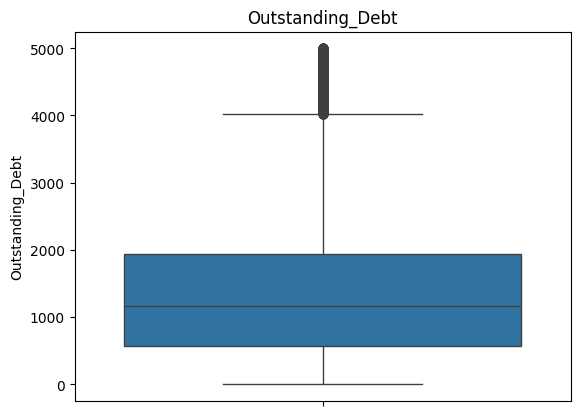

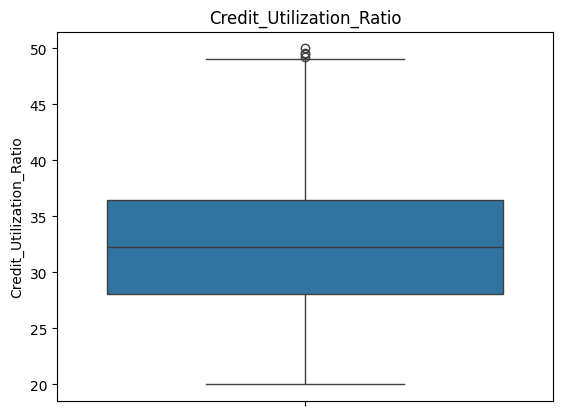

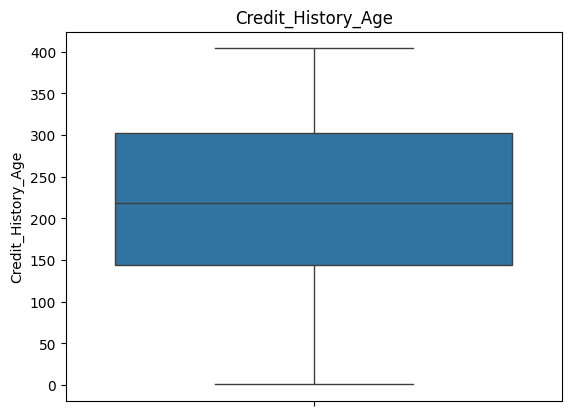

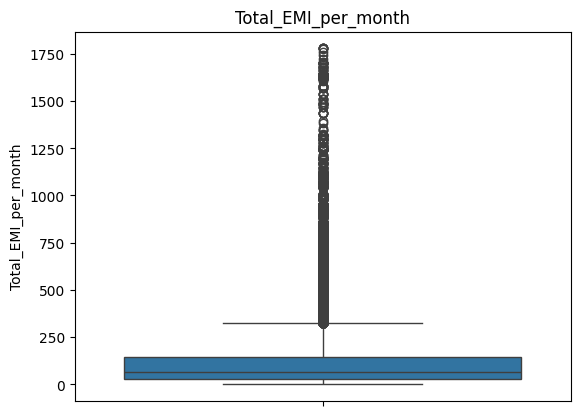

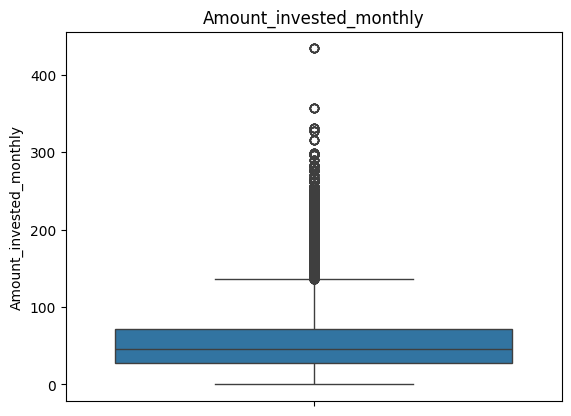

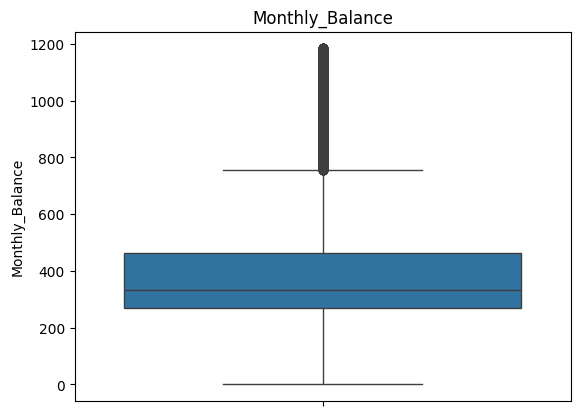

In [294]:
#Creating Boxplot
for i in col:
  plt.figure()
  sns.boxplot(data[i])
  plt.title(i)

Based on boxplot outliers are present in Annual income,Monthly inhand salary, Delay from Due date,Changed credit limit,num credit inquiries,outstanding debt,credit utilization ratio,Total Emi per month, Amount invested monthly and Monthly Balance,

<Axes: ylabel='Annual_Income'>

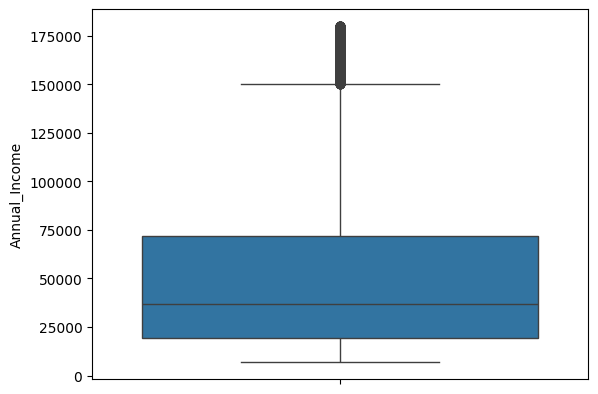

In [295]:
#Annual income
sns.boxplot(data['Annual_Income'])

In [296]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Annual_Income'],25,method='midpoint')
Q3=np.percentile(data['Annual_Income'],75,method='midpoint')

In [297]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

52343.86499999999


In [298]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 150201.33749999997


In [299]:
#finding outliers
outlier=[]

for x in data['Annual_Income']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 173196.32, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 177150.4, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 151722.56, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 162550.32, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174304.04, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 174179.64, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 177243.92, 155726.76, 155726.76, 155726.76, 155726.76, 155726.76, 155726.76, 155726.76, 155726.76, 166907.72, 166907.72, 166907.72, 166907.72, 166907.72, 166907.72, 166907.72, 166907.72, 173968.96, 173968.96, 173968.96, 173968.96, 173968.96, 173968.96, 173968.96, 173968.96, 165002.4, 165002.4, 165002.4, 165002.4, 165002.4, 165002.4, 165002.4, 165002.4, 165774.56, 165774.56, 165774.56, 165774.56, 165

In [300]:
#Number of outliers
len(outlier)

2000

In [301]:
#Descriptive Measures
pd.DataFrame(outlier).describe()

,0
count,2000.00000
mean,166101.33168
std,8564.18186
min,150256.72000
25%,159319.92000
50%,166899.66000
75%,173196.32000
max,179987.28000


There are 2000 outliers and they can be droped

In [302]:
#Index of outliers
out_ind=data.index[data['Annual_Income']>upper_limi]
print(out_ind)

Index([ 1728,  1729,  1730,  1731,  1732,  1733,  1734,  1735,  2352,  2353,
       ...
       98670, 98671, 98928, 98929, 98930, 98931, 98932, 98933, 98934, 98935],
      dtype='int64', length=2000)


In [303]:
#Droping outliers
data.drop(out_ind,inplace=True)

In [304]:
#Shape after dropping outliers
data.shape

(98000, 28)

In [305]:
#Reset index
data.reset_index(drop=True, inplace=True)

<Axes: ylabel='Monthly_Inhand_Salary'>

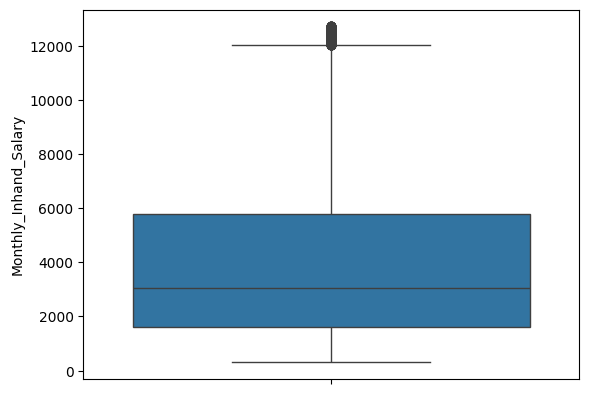

In [306]:
#Monthly in hand salary
sns.boxplot(data['Monthly_Inhand_Salary'])

In [307]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Monthly_Inhand_Salary'],25,method='midpoint')
Q3=np.percentile(data['Monthly_Inhand_Salary'],75,method='midpoint')

In [308]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

4167.609166666668


In [309]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 12034.480416666669


In [310]:
#finding outliers
outlier=[]

for x in data['Monthly_Inhand_Salary']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[12187.22, 12187.22, 12187.22, 12187.22, 12187.22, 12187.22, 12187.22, 12187.22, 12432.61, 12432.61, 12432.61, 12432.61, 12432.61, 12432.61, 12432.61, 12432.61, 12353.633333333331, 12353.633333333331, 12353.633333333331, 12353.633333333331, 12353.633333333331, 12353.633333333331, 12353.633333333331, 12353.633333333331, 12108.896666666667, 12108.896666666667, 12108.896666666667, 12108.896666666667, 12108.896666666667, 12108.896666666667, 12108.896666666667, 12108.896666666667, 12446.18, 12446.18, 12446.18, 12446.18, 12446.18, 12446.18, 12446.18, 12446.18, 12267.946666666665, 12267.946666666665, 12267.946666666665, 12267.946666666665, 12267.946666666665, 12267.946666666665, 12267.946666666665, 12267.946666666665, 12713.01, 12713.01, 12713.01, 12713.01, 12713.01, 12713.01, 12713.01, 12713.01, 12357.573333333336, 12357.573333333336, 12357.573333333336, 12357.573333333336, 12357.573333333336, 12357.573333333336, 12357.573333333336, 12357.573333333336, 12297.74, 12297.74, 12297.74, 12297.74,

In [311]:
#Number of outliers
len(outlier)

588

There are 588 outliers and we can drop those observations

In [312]:
#Index of outliers
out_ind=data.index[data['Monthly_Inhand_Salary']>upper_limi]
print(out_ind)

Index([   16,    17,    18,    19,    20,    21,    22,    23,   344,   345,
       ...
       97517, 97518, 97664, 97665, 97666, 97667, 97668, 97669, 97670, 97671],
      dtype='int64', length=588)


In [313]:
#Droping outliers
data.drop(out_ind,inplace=True)

In [314]:
#Shape after dropping outliers
data.shape

(97412, 28)

In [315]:
#Reset index
data.reset_index(drop=True, inplace=True)

<Axes: ylabel='Delay_from_due_date'>

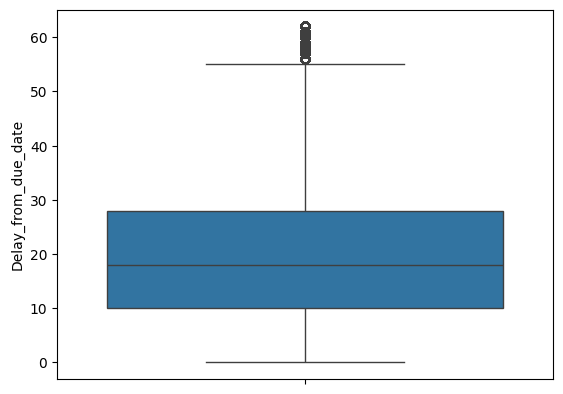

In [316]:
#Delay_from_due_date
sns.boxplot(data['Delay_from_due_date'])

In [317]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Delay_from_due_date'],25,method='midpoint')
Q3=np.percentile(data['Delay_from_due_date'],75,method='midpoint')

In [318]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

18.0


In [319]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 55.0


In [320]:
#finding outliers
outlier=[]

for x in data['Delay_from_due_date']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 58.0, 59.0, 56.0, 59.0, 59.0, 59.0, 61.0, 57.0, 59.0, 57.0, 57.0, 57.0, 57.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 59.0, 62.0, 57.0, 57.0, 59.0, 57.0, 57.0, 57.0, 62.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 57.0, 61.0, 58.0, 61.0, 61.0, 56.0, 61.0, 61.0, 61.0, 56.0, 60.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 56.0, 56.0, 57.0, 59.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 62.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 61.0, 59.0, 57.0, 59.0, 59.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 57.0, 59.0, 60.0, 60.0, 59.0, 60.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 57.0, 59.0, 57.0, 57.0, 58.0, 56.0, 57.0, 57.0, 57.0, 56.0, 59.0, 59.0, 60.0, 61.0, 60.0, 60.0, 61.0, 60.0, 60.0, 58.0, 56.0, 59.0, 57.0, 61.0, 59.0, 59.0, 62.0, 59.0, 59.0, 61.0, 61.0, 61.0, 61.0, 61.0, 62.0, 62.0, 59.0, 61.0, 61.

In [321]:
#Number of outliers
len(outlier)

4002

In [322]:
# Summary Measures
pd.DataFrame(outlier).describe()

,0
count,4002.000000
mean,59.082459
std,2.024888
min,56.000000
25%,57.000000
50%,59.000000
75%,61.000000
max,62.000000


In [323]:
pd.DataFrame(outlier).value_counts()

62.0    638
61.0    586
60.0    578
58.0    565
56.0    555
57.0    552
59.0    528
Name: count, dtype: int64

There are 4002 outliers which act like categorical variables so they are not treated

<Axes: ylabel='Changed_Credit_Limit'>

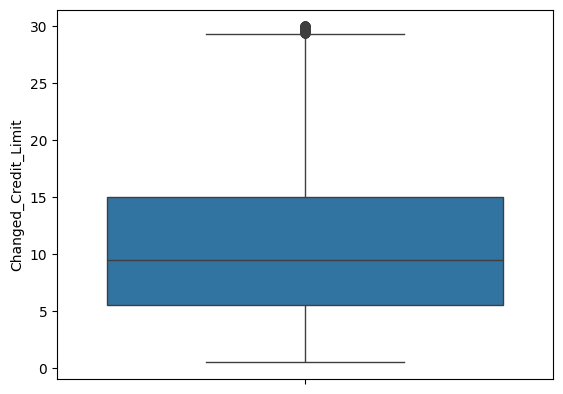

In [324]:
#'Changed_Credit_Limit'
sns.boxplot(data['Changed_Credit_Limit'])

In [325]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Changed_Credit_Limit'],25,method='midpoint')
Q3=np.percentile(data['Changed_Credit_Limit'],75,method='midpoint')


In [326]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

9.549999999999999


In [327]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 29.365


In [328]:
#finding outliers
outlier=[]

for x in data['Changed_Credit_Limit']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[29.52, 29.52, 29.52, 29.52, 29.52, 29.52, 29.52, 29.52, 29.82, 29.82, 29.82, 29.82, 29.82, 29.82, 29.82, 29.82, 29.94, 29.9, 29.97, 29.97, 29.97, 29.97, 29.97, 29.77, 29.77, 29.77, 29.77, 29.77, 29.77, 29.77, 29.77, 29.41, 29.94, 29.84, 29.84, 29.84, 29.84, 29.84, 29.84, 29.84, 29.49, 29.64, 29.64, 29.64, 29.64, 29.64, 29.64, 29.64, 29.64, 29.45, 29.45, 29.45, 29.45, 29.45, 29.45, 29.45, 29.81, 29.66, 29.5, 29.97, 29.97, 29.97, 29.97, 29.97, 29.97, 29.97, 29.39, 29.39, 29.39, 29.39, 29.39, 29.39, 29.39, 29.39, 29.72, 29.72, 29.72, 29.72, 29.72, 29.72, 29.72, 29.72, 29.79, 29.98, 29.98, 29.98, 29.98, 29.98, 29.98, 29.98, 29.98, 29.85, 29.98, 29.98, 29.98, 29.98, 29.98, 29.98, 29.98, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.37, 29.73, 29.86, 29.86, 29.86, 29.86, 29.86, 29.86, 29.86, 29.76, 29.39, 29.39, 29.39, 29.39, 29.39, 29.39, 29.39, 29.39, 29.41, 29.54, 29.54, 29.54, 29.54, 29.54, 29.54, 29.96, 29.96, 29.96, 29.96, 

In [329]:
pd.DataFrame(outlier).describe()

,0
count,414.000000
mean,29.682850
std,0.193654
min,29.370000
25%,29.520000
50%,29.700000
75%,29.857500
max,29.980000


In [330]:
#Number of outliers
len(outlier)

414

These outliers are situated together and their standard deviation is very small therefore i am not dropping these values. Because removing a lot of values may reach to loss of info

<Axes: ylabel='Num_Credit_Inquiries'>

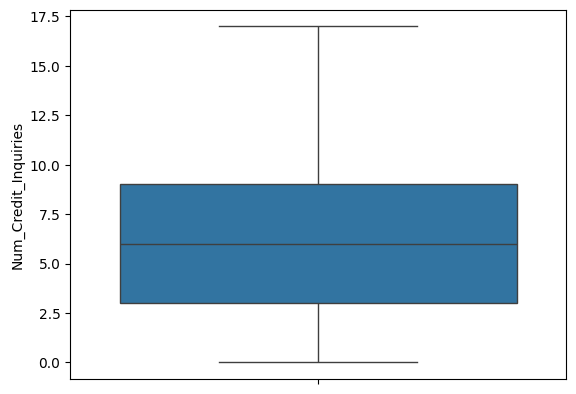

In [331]:
#'Num_Credit_Inquiries'
sns.boxplot(data['Num_Credit_Inquiries'])

Outliers in Num_credit_inquiries are already treated

<Axes: ylabel='Outstanding_Debt'>

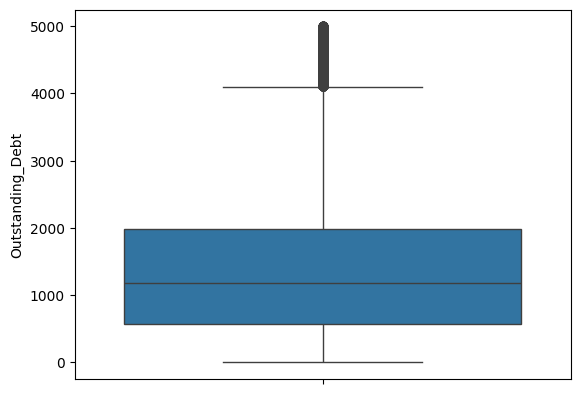

In [332]:
#'Outstanding_Debt'
sns.boxplot(data['Outstanding_Debt'])

In [333]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Outstanding_Debt'],25,method='midpoint')
Q3=np.percentile(data['Outstanding_Debt'],75,method='midpoint')

In [334]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

1411.24


In [335]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 4103.31


In [336]:
#finding outliers
outlier=[]

for x in data['Outstanding_Debt']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[4834.59, 4834.59, 4834.59, 4834.59, 4834.59, 4834.59, 4834.59, 4834.59, 4795.13, 4795.13, 4795.13, 4795.13, 4795.13, 4795.13, 4795.13, 4795.13, 4984.82, 4984.82, 4984.82, 4984.82, 4984.82, 4984.82, 4984.82, 4984.82, 4845.24, 4845.24, 4845.24, 4845.24, 4845.24, 4845.24, 4845.24, 4845.24, 4428.64, 4428.64, 4428.64, 4428.64, 4428.64, 4428.64, 4428.64, 4428.64, 4167.43, 4167.43, 4167.43, 4167.43, 4167.43, 4167.43, 4167.43, 4167.43, 4445.32, 4445.32, 4445.32, 4445.32, 4445.32, 4445.32, 4445.32, 4445.32, 4404.48, 4404.48, 4404.48, 4404.48, 4404.48, 4404.48, 4404.48, 4404.48, 4525.08, 4525.08, 4525.08, 4525.08, 4525.08, 4525.08, 4525.08, 4525.08, 4288.63, 4288.63, 4288.63, 4288.63, 4288.63, 4288.63, 4288.63, 4288.63, 4685.34, 4685.34, 4685.34, 4685.34, 4685.34, 4685.34, 4685.34, 4685.34, 4736.25, 4736.25, 4736.25, 4736.25, 4736.25, 4736.25, 4736.25, 4736.25, 4196.17, 4196.17, 4196.17, 4196.17, 4196.17, 4196.17, 4196.17, 4196.17, 4293.32, 4293.32, 4293.32, 4293.32, 4293.32, 4293.32, 4293.32, 

In [337]:
#Number of outliers
len(outlier)

4880

In [338]:
pd.DataFrame(outlier).describe()

,0
count,4880.000000
mean,4552.006230
std,257.801786
min,4103.780000
25%,4332.940000
50%,4556.625000
75%,4764.130000
max,4998.070000


There are 4880 outliers in Outstanding debt but i am droping those outliers

In [339]:
#Index of outliers
out_ind=data.index[data['Outstanding_Debt']>upper_limi]
print(out_ind)

Index([  464,   465,   466,   467,   468,   469,   470,   471,   512,   513,
       ...
       97170, 97171, 97260, 97261, 97262, 97263, 97264, 97265, 97266, 97267],
      dtype='int64', length=4880)


In [340]:
#Droping outliers
data.drop(out_ind,inplace=True)

In [341]:
#Shape after dropping outliers
data.shape

(92532, 28)

In [342]:
#Reset index
data.reset_index(drop=True, inplace=True)

<Axes: ylabel='Credit_Utilization_Ratio'>

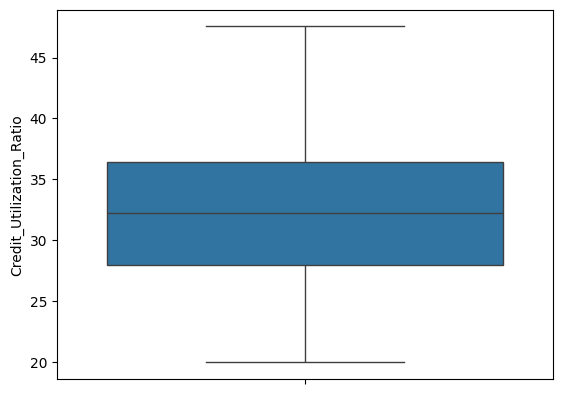

In [343]:
# 'Credit_Utilization_Ratio'
sns.boxplot(data['Credit_Utilization_Ratio'])

Outliers in 'Credit_Utilization_Ratio' has been treated

<Axes: ylabel='Total_EMI_per_month'>

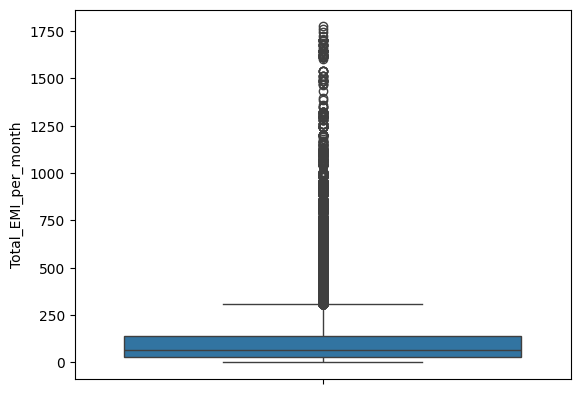

In [344]:
# 'Total_EMI_per_month'
sns.boxplot(data['Total_EMI_per_month'])

In [345]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Total_EMI_per_month'],25,method='midpoint')
Q3=np.percentile(data['Total_EMI_per_month'],75,method='midpoint')

In [346]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

111.77991575322095


In [347]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 307.06375470622606


In [348]:
#finding outliers
outlier=[]

for x in data['Total_EMI_per_month']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[911.2201793459374, 911.2201793459374, 911.2201793459374, 911.2201793459374, 911.2201793459374, 911.2201793459374, 629.8156531464217, 629.8156531464217, 629.8156531464217, 629.8156531464217, 629.8156531464217, 314.90178526768176, 314.90178526768176, 314.90178526768176, 314.90178526768176, 314.90178526768176, 314.90178526768176, 314.90178526768176, 314.90178526768176, 574.0657978713467, 574.0657978713467, 574.0657978713467, 574.0657978713467, 574.0657978713467, 574.0657978713467, 574.0657978713467, 574.0657978713467, 485.75043098703753, 485.75043098703753, 485.75043098703753, 485.75043098703753, 485.75043098703753, 485.75043098703753, 485.75043098703753, 485.75043098703753, 351.36704467467814, 351.36704467467814, 351.36704467467814, 351.36704467467814, 1293.5054487288114, 1293.5054487288114, 1293.5054487288114, 460.4272666027642, 460.4272666027642, 389.3056724525229, 389.3056724525229, 389.3056724525229, 389.3056724525229, 389.3056724525229, 389.3056724525229, 389.3056724525229, 389.305

In [349]:
#Number of outliers
len(outlier)

4718

In [350]:
pd.DataFrame(outlier).describe()

,0
count,4718.000000
mean,482.607559
std,247.761000
min,307.144798
25%,340.104957
50%,385.601185
75%,499.732025
max,1775.000000


There are 4718 outliers in Total EMI per month but removing all those outliers may lead to loss of information so outliers above 1250 will be removed

In [351]:
#Index of outliers
out_ind=data.index[data['Total_EMI_per_month']>1250]
print(out_ind)

Index([  533,   534,   535,   763,   764,   765,   766,   767,  5274,  5275,
       ...
       74645, 78258, 78560, 81626, 87332, 88533, 89348, 89963, 91114, 92083],
      dtype='int64', length=119)


In [352]:
#Droping outliers
data.drop(out_ind,inplace=True)

In [353]:
#Shape after dropping outliers
data.shape

(92413, 28)

In [354]:
#Reset index
data.reset_index(drop=True, inplace=True)

<Axes: ylabel='Amount_invested_monthly'>

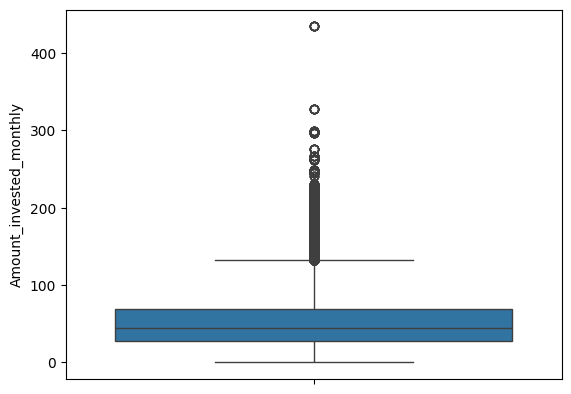

In [355]:
# 'Amount_invested_monthly'
sns.boxplot(data['Amount_invested_monthly'])

In [356]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Amount_invested_monthly'],25,method='midpoint')
Q3=np.percentile(data['Amount_invested_monthly'],75,method='midpoint')


In [357]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

41.60993447284728


In [358]:
#Upper limit
upper_limi=Q3+1.5*IQR
print("upper value",upper_limi)

upper value 131.9796704117783


In [359]:
#finding outliers
outlier=[]

for x in data['Amount_invested_monthly']:
  if (x>upper_limi):
    outlier.append(x)

print(outlier)

[212.23560220847847, 212.23560220847847, 212.23560220847847, 212.23560220847847, 212.23560220847847, 212.23560220847847, 212.23560220847847, 212.23560220847847, 172.03282853259896, 172.03282853259896, 172.03282853259896, 172.03282853259896, 172.03282853259896, 172.03282853259896, 172.03282853259896, 172.03282853259896, 159.13672195005464, 159.13672195005464, 159.13672195005464, 159.13672195005464, 159.13672195005464, 159.13672195005464, 159.13672195005464, 159.13672195005464, 202.5717008716825, 202.5717008716825, 202.5717008716825, 202.5717008716825, 202.5717008716825, 202.5717008716825, 202.5717008716825, 202.5717008716825, 186.5091567501205, 186.5091567501205, 186.5091567501205, 186.5091567501205, 186.5091567501205, 186.5091567501205, 186.5091567501205, 186.5091567501205, 156.87022098028402, 156.87022098028402, 156.87022098028402, 156.87022098028402, 156.87022098028402, 156.87022098028402, 156.87022098028402, 156.87022098028402, 227.5336623454579, 227.5336623454579, 227.5336623454579

In [360]:
#Number of outliers
len(outlier)

3393

In [361]:
pd.DataFrame(outlier).describe()

,0
count,3393.000000
mean,162.791820
std,31.910468
min,132.144042
25%,141.873229
50%,153.749724
75%,173.857422
max,434.191089


There are 3393 outliers in Amount invested monthly and i am droping those outliers above 200 because removing all outliers may lead to lose of information

In [362]:
#Index of outliers
out_ind=data.index[data['Amount_invested_monthly']>200]
print(out_ind)

Index([   56,    57,    58,    59,    60,    61,    62,    63,   376,   377,
       ...
       88686, 88687, 91701, 91702, 91703, 91704, 91705, 91706, 91707, 91708],
      dtype='int64', length=359)


In [363]:
#Droping outliers
data.drop(out_ind,inplace=True)

In [364]:
#Shape after dropping outliers
data.shape

(92054, 28)

In [365]:
#Reset index
data.reset_index(drop=True, inplace=True)

<Axes: ylabel='Monthly_Balance'>

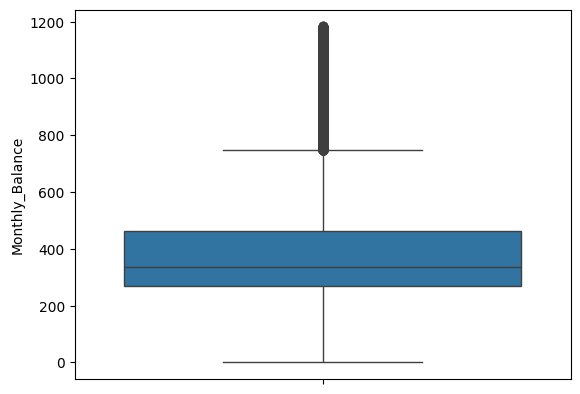

In [366]:
# 'Monthly_Balance'
sns.boxplot(data['Monthly_Balance'])

In [367]:
#Q1 and Q3 for annual income
Q1=np.percentile(data['Monthly_Balance'],25,method='midpoint')
Q3=np.percentile(data['Monthly_Balance'],75,method='midpoint')


In [368]:
#Inter quartile range
IQR=Q3-Q1
print(IQR)

190.95428349351175


In [369]:
low_limi=Q1-1.5*IQR
upper_limi=Q3+1.5*IQR
print("lower value",low_limi)
print("upper value",upper_limi)

lower value -15.779941344385122
upper value 748.0371926296618


In [370]:
#finding outliers
outlier=[]

for x in data['Monthly_Balance']:
  if ((x<low_limi) or (x>upper_limi)):
    outlier.append(x)

print(outlier)

[796.2349097481042, 858.462474411158, 1038.5694068321734, 899.1987716145285, 963.2548189998564, 1140.0673399198365, 854.5248768604907, 823.7133773417005, 878.2514462337779, 920.4396545057372, 782.5739727857823, 939.8734297713614, 761.0743967007086, 755.2081802943327, 881.6642742251445, 970.3192716601592, 939.6245613800266, 947.6102963746632, 768.9823963390119, 955.3099214674012, 791.733614589316, 913.0316546874346, 936.3073773982208, 792.5790252202852, 795.554663772378, 886.9776435574988, 840.0253760517992, 887.7276173808908, 879.7520667701468, 760.3649552023904, 776.3343613074152, 940.3944827695152, 1157.8575217994078, 789.4419359341587, 1162.421393877239, 1120.751173160778, 829.6035974828641, 874.4794397596812, 803.4807268582417, 799.4042335851245, 808.7829610365477, 1023.8862584616704, 942.7407829446952, 755.6052658551358, 1142.1479360533442, 936.8794294508784, 782.0757975792985, 1026.919210516303, 1180.066234041289, 1078.4925753226107, 790.3496192135598, 803.9885700984828, 818.2430

In [371]:
#Number of outliers
len(outlier)

6328

In [372]:
pd.DataFrame(outlier).describe()

,0
count,6328.000000
mean,888.303481
std,105.778146
min,748.054543
25%,802.697892
50%,863.389679
75%,956.919448
max,1183.625104


There are 6328 outliers in Monthly Balance but it is not good to remove all the outliers i am removing only the outliers less than the lower limit

In [373]:
#Index of outliers
out_ind=data.index[((data['Monthly_Balance']<low_limi))]
print(out_ind)

Index([], dtype='int64')


In [374]:
#Droping outliers
data.drop(out_ind,inplace=True)

In [375]:
#Shape after dropping outliers
data.shape

(92054, 28)

In [376]:
#Reset index
data.reset_index(drop=True, inplace=True)

In [377]:
#Checking whether there is any duplicates in the data
data.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [378]:
pd.set_option('display.max_columns', None)
data.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
5,5639,3392,6,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8.0,4.0,9.27,4.0,Good,809.98,27.262259,270.0,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good
6,5640,3392,7,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,8.0,11.27,4.0,Good,809.98,22.537593,271.0,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good
7,5641,3392,8,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,6.0,11.27,4.0,Good,809.98,23.933795,272.0,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard
8,5646,8625,1,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,24.464031,319.0,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard
9,5647,8625,2,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,7.0,1.0,7.42,2.0,Good,605.03,38.550848,320.0,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good


In [379]:
data.shape

(92054, 28)

In [380]:
# Summary measures of the data
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,92054.000000,92054.000000,92054.000000,92054.000000,9.205400e+04,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000,92054.000000
mean,80658.718839,25973.455830,4.499250,33.434310,5.003894e+08,47971.141892,3987.277879,5.308591,5.459317,14.229083,3.397995,20.497078,13.162578,10.146033,5.663915,1282.804993,32.217891,225.990831,100.254832,52.516086,390.798741
std,43261.433978,14324.046144,2.291281,10.795223,2.914417e+08,34127.547914,2839.918453,2.559271,2.031305,8.576862,2.357318,14.337984,6.119202,6.260228,3.810564,941.463982,5.072173,96.902265,116.224169,33.569726,192.074645
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43154.250000,13717.000000,2.000000,25.000000,2.431642e+08,19428.030000,1634.523387,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.350000,3.000000,550.980000,28.009992,153.000000,27.589593,27.898127,270.651229
50%,80743.500000,25770.000000,4.000000,33.000000,5.009417e+08,36446.260000,3045.293333,5.000000,5.000000,13.000000,3.000000,18.000000,13.000000,9.270000,5.000000,1125.300000,32.235970,223.000000,63.078418,44.675853,336.546037
75%,118151.750000,38351.750000,6.000000,42.000000,7.576284e+08,69601.240000,5781.146667,7.000000,7.000000,20.000000,5.000000,27.000000,18.000000,14.140000,8.000000,1752.550000,36.430274,304.000000,138.438131,69.071032,461.608368
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,146880.840000,12034.433333,11.000000,11.000000,34.000000,9.000000,62.000000,25.000000,29.980000,17.000000,4100.980000,47.555983,404.000000,1245.569803,199.516749,1183.625104


From the above table the mean age of customers is 33.43, the mean annual income is 47971.14, the minimum age of customers is 14, maximum age is 56 and the mean interest rate is 14.23% these are some of the information that we get from the data

In [381]:
#Summary measures of object data type
data.describe(include='object')

,Name,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,92054,92054,92054,92054,92054,92054,92054
unique,9484,15,5604,3,3,6,3
top,Jessicad,Lawyer,No Data,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,48,6583,10798,45351,47747,26580,49373


From the above table there are 3 distinct categories of credit score and Standard is the most occuring creditworthiness levels. Total number of unique customers are 9484 with 'Jessicad' as the top customer.

<Axes: xlabel='Credit_Score', ylabel='count'>

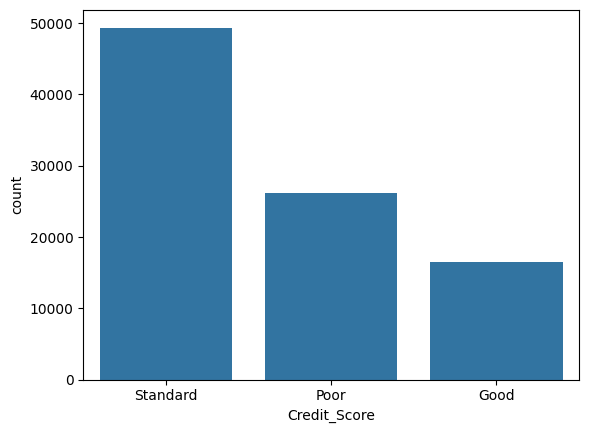

In [382]:
#Number of observations for each category of credit score
sns.barplot(data['Credit_Score'].value_counts())

The above box plot indicates that most of the observations in our data have a standard credit score and least number of observations have a good credit score

<Axes: xlabel='Credit_Score', ylabel='Age'>

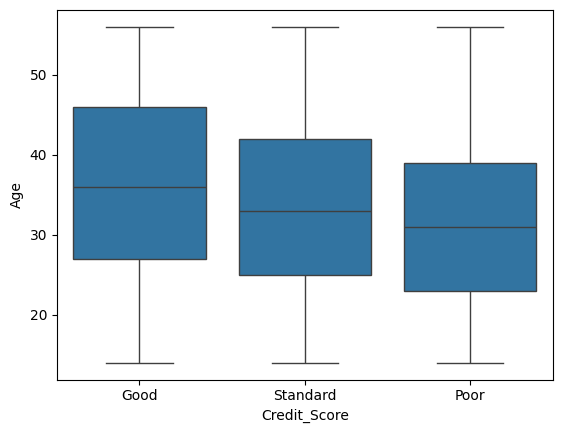

In [383]:
# Boxplot of age grouped by credit score
sns.boxplot(data,x='Credit_Score',y='Age')

From the above plot we can see that there is a slight difference between the distribution of age for different credit score

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

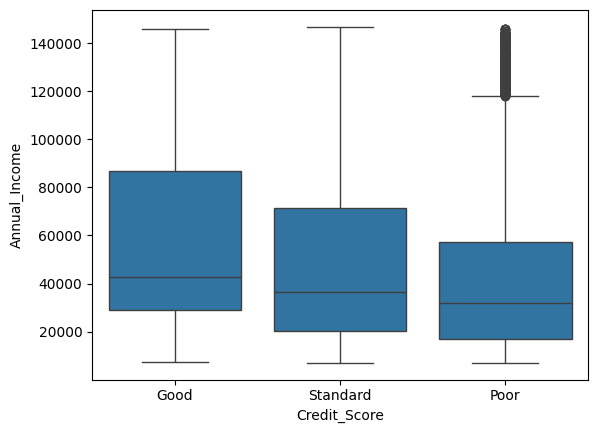

In [384]:
# Boxplot of Annual income grouped by credit score
sns.boxplot(data,x='Credit_Score',y='Annual_Income')

In the above boxplots we can observe that there is a difference in the distribution of values of annual income for each type of credit score

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

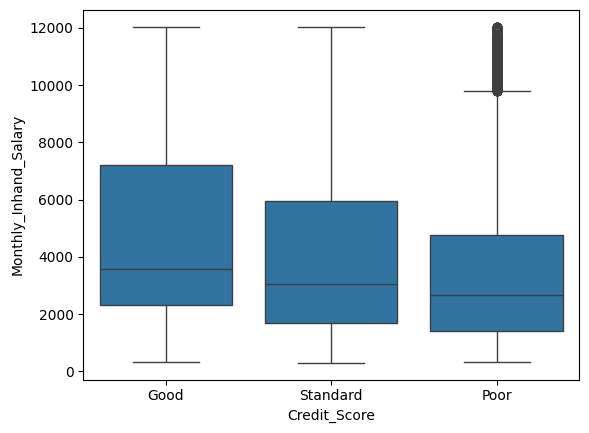

In [385]:
# Boxplot of Monthly_Inhand_Salary grouped by credit score
sns.boxplot(data,x='Credit_Score',y='Monthly_Inhand_Salary')

In the above boxplots we can observe that there is a difference in the distribution of values of Monthly inhand salary for each type of credit score

<Axes: xlabel='Credit_Score', ylabel='Credit_Utilization_Ratio'>

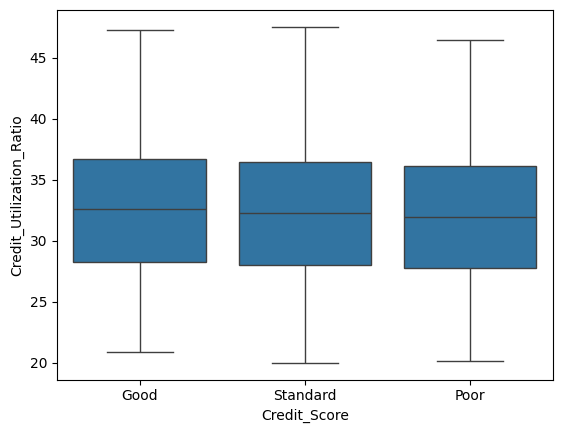

In [386]:
# Boxplot of Credit_Utilization_Ratio grouped by credit score
sns.boxplot(data,x='Credit_Score',y='Credit_Utilization_Ratio')

In the above boxplots we can observe that there is no difference in the distribution of values of credit utilization ratio for each type of credit score

<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

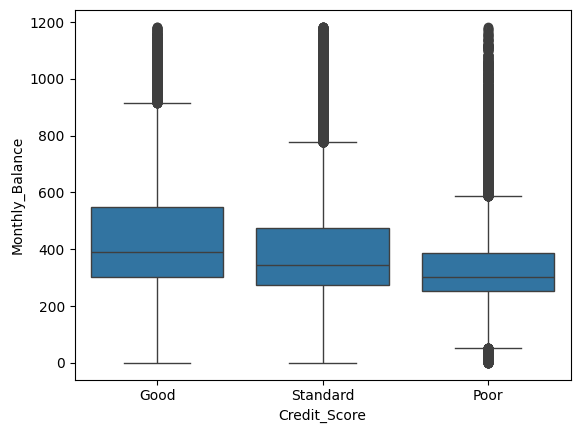

In [387]:
# Boxplot of Monthly_Balance grouped by credit score
sns.boxplot(data,x='Credit_Score',y='Monthly_Balance')

In the above boxplots we can observe that there is a difference in the distribution of values of Monthly Balance for each type of credit score

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

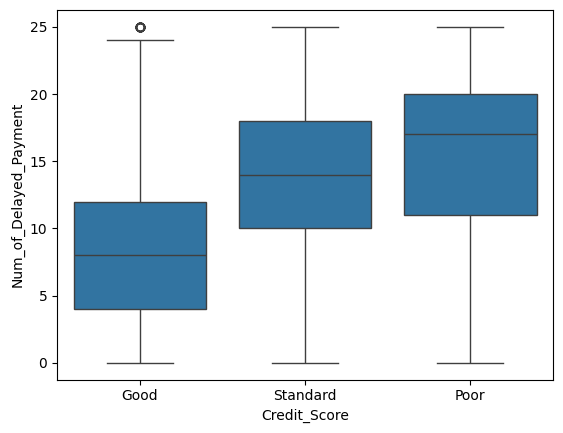

In [388]:
# Boxplot of Num_of_Delayed_Payment grouped by credit score
sns.boxplot(data,x='Credit_Score',y='Num_of_Delayed_Payment')

In the above boxplots we can observe that there is a difference in the distribution of values of Number of delayed payment for each type of credit score

In [389]:
#Mean value grouped by credit score
data.groupby('Credit_Score')[['Age','SSN','Annual_Income','Monthly_Inhand_Salary','Credit_Utilization_Ratio','Monthly_Balance','Interest_Rate','Outstanding_Debt','Total_EMI_per_month']].mean()

,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Credit_Utilization_Ratio,Monthly_Balance,Interest_Rate,Outstanding_Debt,Total_EMI_per_month
Credit_Score,,,,,,,,,
Good,36.430752,4.985895e+08,58316.177430,4830.911382,32.502855,444.902055,7.595828,778.954555,107.508316
Poor,31.268788,4.935432e+08,39310.222882,3274.316923,31.952866,339.807340,20.038224,1884.492775,106.113247
Standard,33.587406,5.046273e+08,49129.260410,4085.264979,32.263850,399.882690,13.350576,1130.809320,94.725913


The above table shows mean values for some variables for each type of credit score.

In [390]:
# Credit score vs Month
M_C=pd.crosstab(data['Month'], data['Credit_Score'])
M_C=pd.concat([M_C,M_C.sum(axis=1)],axis=1)
M_C=pd.concat([M_C,pd.DataFrame(M_C.sum(axis=0)).transpose()],axis=0)
M_C.columns=['Good','Poor','Standard','Row Total']
M_C.index=['1','2','3','4','5','6','7','8','Column Total']
M_C

,Good,Poor,Standard,Row Total
1,1810,3244,6459,11513
2,1839,3201,6471,11511
3,1818,3217,6472,11507
4,2177,3319,6011,11507
5,2138,3356,6015,11509
6,2186,3356,5962,11504
7,2232,3281,5990,11503
8,2241,3266,5993,11500
Column Total,16441,26240,49373,92054


In [391]:
# Credit score vs Occupation
O_C=pd.crosstab(data['Occupation'], data['Credit_Score'])
O_C=pd.concat([O_C,O_C.sum(axis=1)],axis=1)
O_C.columns=['Good','Poor','Standard','Row Total']
O_C=O_C.sort_values(by='Row Total', ascending=False)
O_C=pd.concat([O_C,pd.DataFrame(O_C.sum(axis=0)).transpose()],axis=0)
O_C.index=['Lawyer','Engineer','Media_Manager','Architect','Developer','Scientist','Mechanic','Accountant','Teacher','Entrepreneur','Journalist','Doctor'	,'Manager',
           'Writer','Musician','Column Total']
O_C

,Good,Poor,Standard,Row Total
Lawyer,1179,1791,3613,6583
Engineer,1174,1905,3251,6330
Media_Manager,1177,1613,3458,6248
Architect,1114,1671,3460,6245
Developer,1115,1772,3343,6230
Scientist,1091,1888,3246,6225
Mechanic,1003,1810,3384,6197
Accountant,1107,1850,3235,6192
Teacher,1166,1814,3163,6143
Entrepreneur,1090,1864,3174,6128


In [392]:
#Occupation vs Credit score in %
tab=pd.crosstab(data['Occupation'], data['Credit_Score'],margins=True,margins_name='Total',normalize='index')*100
tab1=pd.concat([tab,tab.sum(axis=1)],axis=1)
tab1=tab1.round(2)
tab1.columns=['Good','Poor','Standard','Row Total']
tab1=tab1.applymap(lambda x: str(x) + '%')
tab1

,Good,Poor,Standard,Row Total
Occupation,,,,
Accountant,17.88%,29.88%,52.24%,100.0%
Architect,17.84%,26.76%,55.4%,100.0%
Developer,17.9%,28.44%,53.66%,100.0%
Doctor,17.67%,26.75%,55.58%,100.0%
Engineer,18.55%,30.09%,51.36%,100.0%
Entrepreneur,17.79%,30.42%,51.8%,100.0%
Journalist,19.01%,27.41%,53.59%,100.0%
Lawyer,17.91%,27.21%,54.88%,100.0%
Manager,19.11%,28.19%,52.71%,100.0%


Text(0.5, 1.0, 'Num of loan vs credit score')

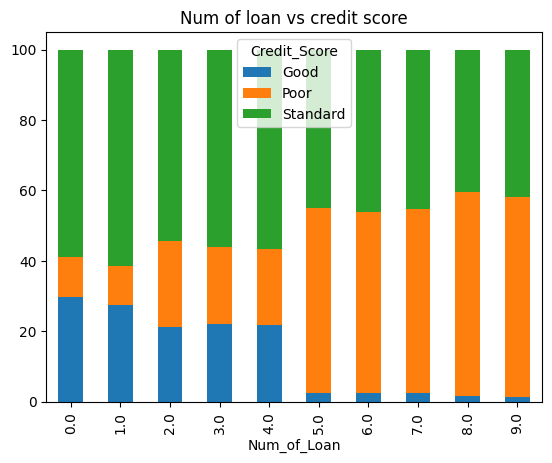

In [393]:
#Stacked Barplot of Num of loan vs credit score
(pd.crosstab(data['Num_of_Loan'], data['Credit_Score'],normalize='index')*100).plot(kind='bar', stacked=True)
plt.title('Num of loan vs credit score')

From the above stacked bar plot we can understand that the percentage of customers having good credit score is very less among custaomers with number of loan 5 or more. We can also observe increase in percentage for poor credit score customers and decrease in percentage for standard customers as number of loan increases

Text(0.5, 1.0, 'Num_Bank_Accounts vs credit score')

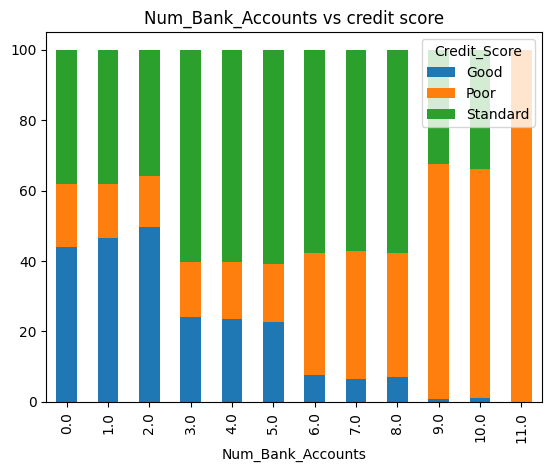

In [394]:
#Stacked Barplot of Num_Bank_Accounts vs credit score
(pd.crosstab(data['Num_Bank_Accounts'], data['Credit_Score'],normalize='index')*100).plot(kind='bar', stacked=True)
plt.title('Num_Bank_Accounts vs credit score')

In the above graph we can observe that as the number of bank accounts increases the percentage of  customers having good credit scores decreases

Text(0.5, 1.0, 'Num_Credit_Card vs credit score')

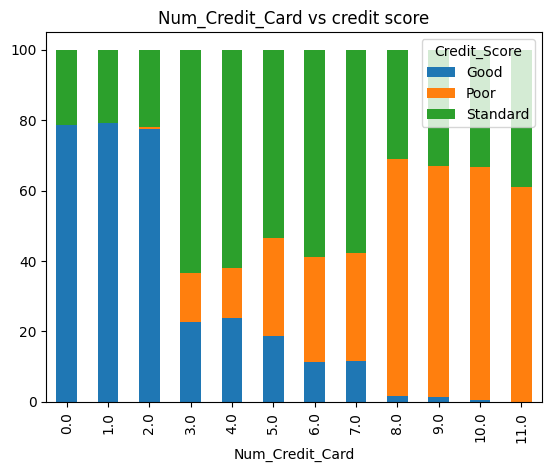

In [395]:
 #Stacked Barplot of Num_Credit_Card vs credit score
(pd.crosstab(data['Num_Credit_Card'], data['Credit_Score'],normalize='index')*100).plot(kind='bar', stacked=True)
plt.title('Num_Credit_Card vs credit score')

In the above graph we can observe that as the number of credit card increases the percentage of customers having good credit scores decreases

Text(0.5, 1.0, 'Interest_Rate vs credit score')

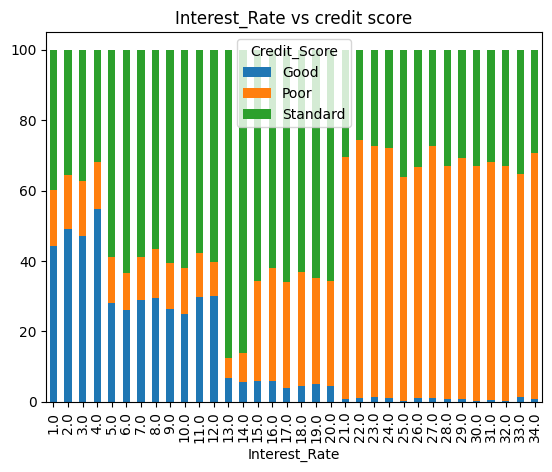

In [396]:
#Stacked Barplot of Interest_Rate vs credit score
(pd.crosstab(data['Interest_Rate'], data['Credit_Score'],normalize='index')*100).plot(kind='bar', stacked=True)
plt.title('Interest_Rate vs credit score')

In the above graph we can observe that as the interest rate increases the percentage of  customers having good credit scores decreases

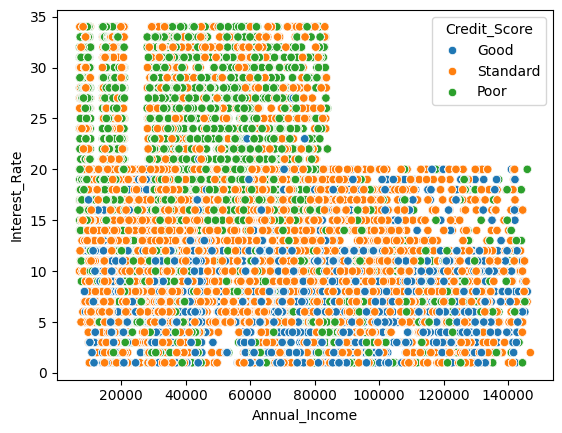

In [397]:
#Scatter plot of Annual income vs Interest rate
sns.scatterplot(x='Annual_Income', y='Interest_Rate', hue='Credit_Score', data=data)
plt.show()

In the above scatterplot we can observe that most of the customers with poor credit score has high interest and most of the customers with Good credit score has low interesst rate.

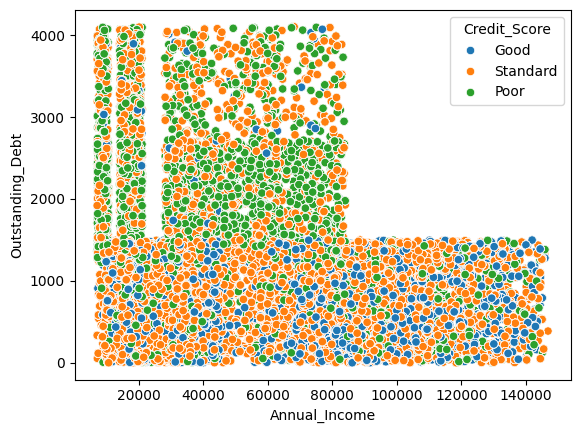

In [398]:
#Scatterplot of Annual incomee vs Outstanding debt
sns.scatterplot(x='Annual_Income', y='Outstanding_Debt', hue='Credit_Score', data=data)
plt.show()

In the above scatterplot we can observe that most of the customers with poor credit score has low annual income and high oustanding debt.

In [399]:
#Droping useless features
data.drop(['ID','Customer_ID','Name','Type_of_Loan'],axis=1,inplace=True)

# Encoding

In [400]:
data.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [401]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [402]:
#Fitting
data['Occupation']=le.fit_transform(data['Occupation'])
data['Credit_Mix']=le.fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount']=le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour']=le.fit_transform(data['Payment_Behaviour'])


In [403]:
data.head()

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089,Good
1,2,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162,Good
2,3,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863,Good
3,4,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,21.46538,5,223.451310,Good
4,5,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,21.46538,1,341.489231,Good


In [404]:
#Splitting data into Dependent and Independent
X=data.drop('Credit_Score',axis=1)
y=data['Credit_Score']

In [405]:
X.head(3)

,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,1,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,21.46538,2,312.494089
1,2,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,1,809.98,31.944960,266.0,1,49.574949,21.46538,3,284.629162
2,3,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,21.46538,4,331.209863


In [406]:
y.head(3)

0    Good
1    Good
2    Good
Name: Credit_Score, dtype: object

#Data Split

In [407]:
# Train and Temp split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [408]:
#Validation and Test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,stratify=y_temp,random_state=42)

In [409]:
#Dimensions for each split
X_train.shape,X_test.shape,X_val.shape

((64437, 23), (13809, 23), (13808, 23))